In [40]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

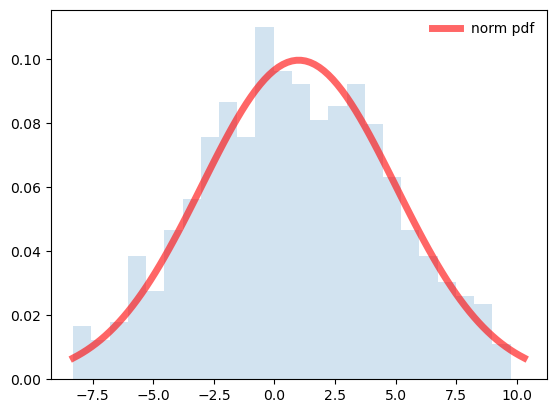

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.8295917551055695
Sample variance: 17.92617443131952


In [29]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

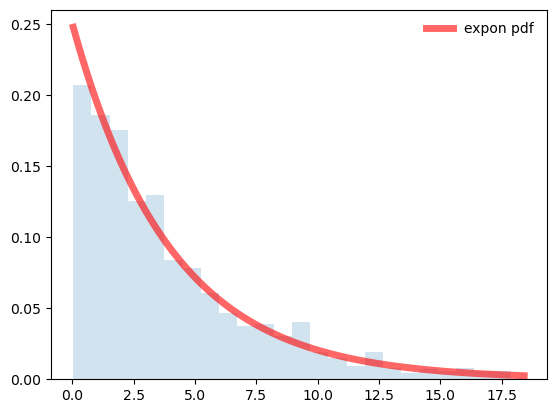

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.131474876308637
Sample variance: 16.858322908039227


In [30]:
#expon
rv_expon = expon(scale = 4)
x = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
r = rv_expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

## Comment
The results show that the theoretical mean of the exponential distribution is 4, matching the scale parameter used to define the distribution. Similarly, the theoretical variance is 16, calculated as the square of the scale parameter. The sample mean and variance, calculated from 1,000 random samples, are approximately 4,1 and 16,85 respectively. These values are close to the theoretical values, indicating that the sampled data accurately reflects the properties of the distribution, with small differences due to random variation and sample size. This comparison highlights the reliability of the random sampling process and the accuracy of the distribution's theoretical model.


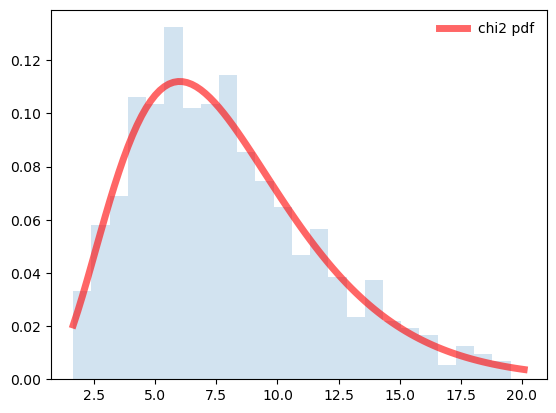

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.09503781154335
Sample variance: 17.80077025490903


In [31]:
#chi
rv_chi2 = chi2(df = 8)
x = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_chi2.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r = rv_chi2.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


## Comment
The code demonstrates working with the chi-squared distribution, which is a widely used distribution in statistics. The chi-squared distribution arises in tests of independence, goodness-of-fit, and variance estimation. It is defined by degrees of freedom (df), which in this case is set to 8. The code visualizes the probability density function (PDF) and a histogram of 1,000 random samples drawn from the distribution.

The theoretical mean and variance of the chi-squared distribution are equal to the degrees of freedom (df) and twice the degrees of freedom (2 * df), respectively. In this example, the mean is 8, and the variance is 16. The calculated sample mean 8,09 and sample variance 17,08 are close to the theoretical values, showing that the random sampling process aligns well with the expected properties of the chi-squared distribution. This comparison highlights the practical consistency of the theoretical model with real sampled data.

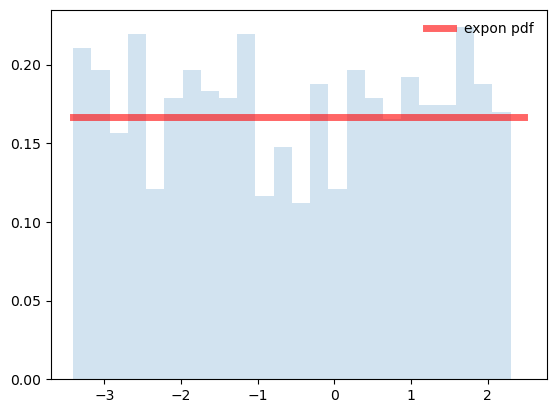

Distribution mean: -0.4641016151377544
Distribution variance: 3.0
Sample mean: -0.467490273319701
Sample variance: 3.205575701314295


In [32]:
#uniform

rv_norm1 = uniform(loc = -2*np.sqrt(3) , scale = 6)
x = np.linspace(rv_norm1.ppf(0.01), rv_norm1.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm1.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
r = rv_norm1.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm1.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm1.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: uniform

## Comment
Here my  code works with a uniform distribution using the scipy.stats.uniform class. The distribution has a range defined by loc = -2√3 (starting point) and scale = 6 (length of the range). It plots the probability density function (PDF) and a histogram of 1,000 random samples, showing how the data is evenly spread across the range.

The theoretical mean of the distribution is around  -0,46 and the variance is 3. The sample mean -0.46 and variance 3,2 are very close to these values. This shows that the samples correctly follow the uniform distribution, where every value in the range is equally likely.


# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

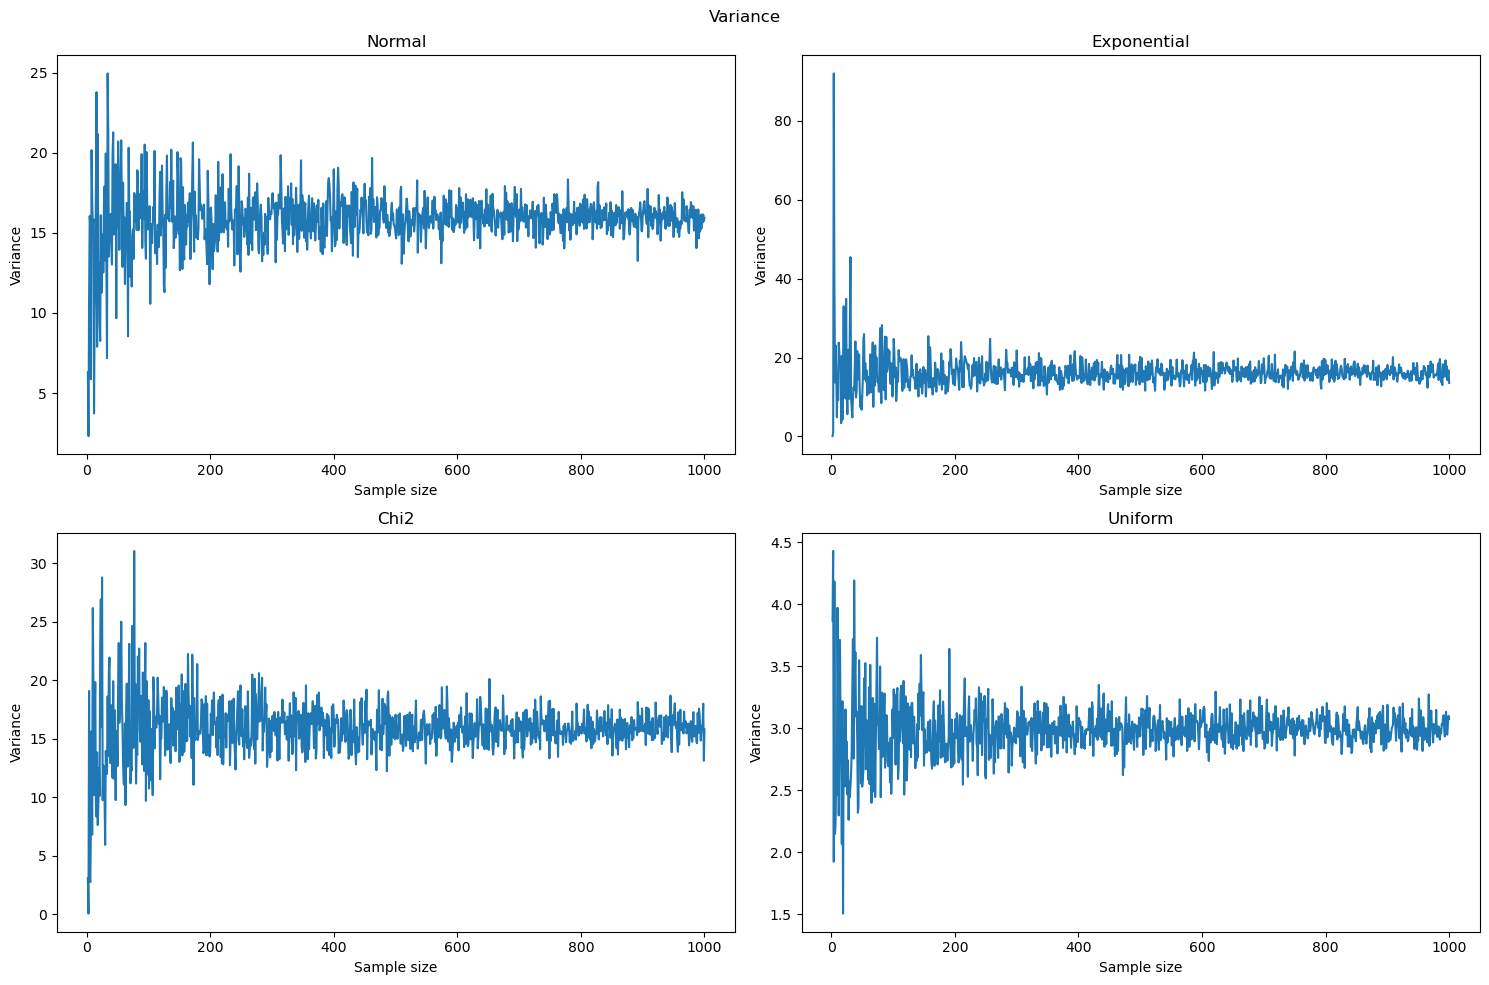

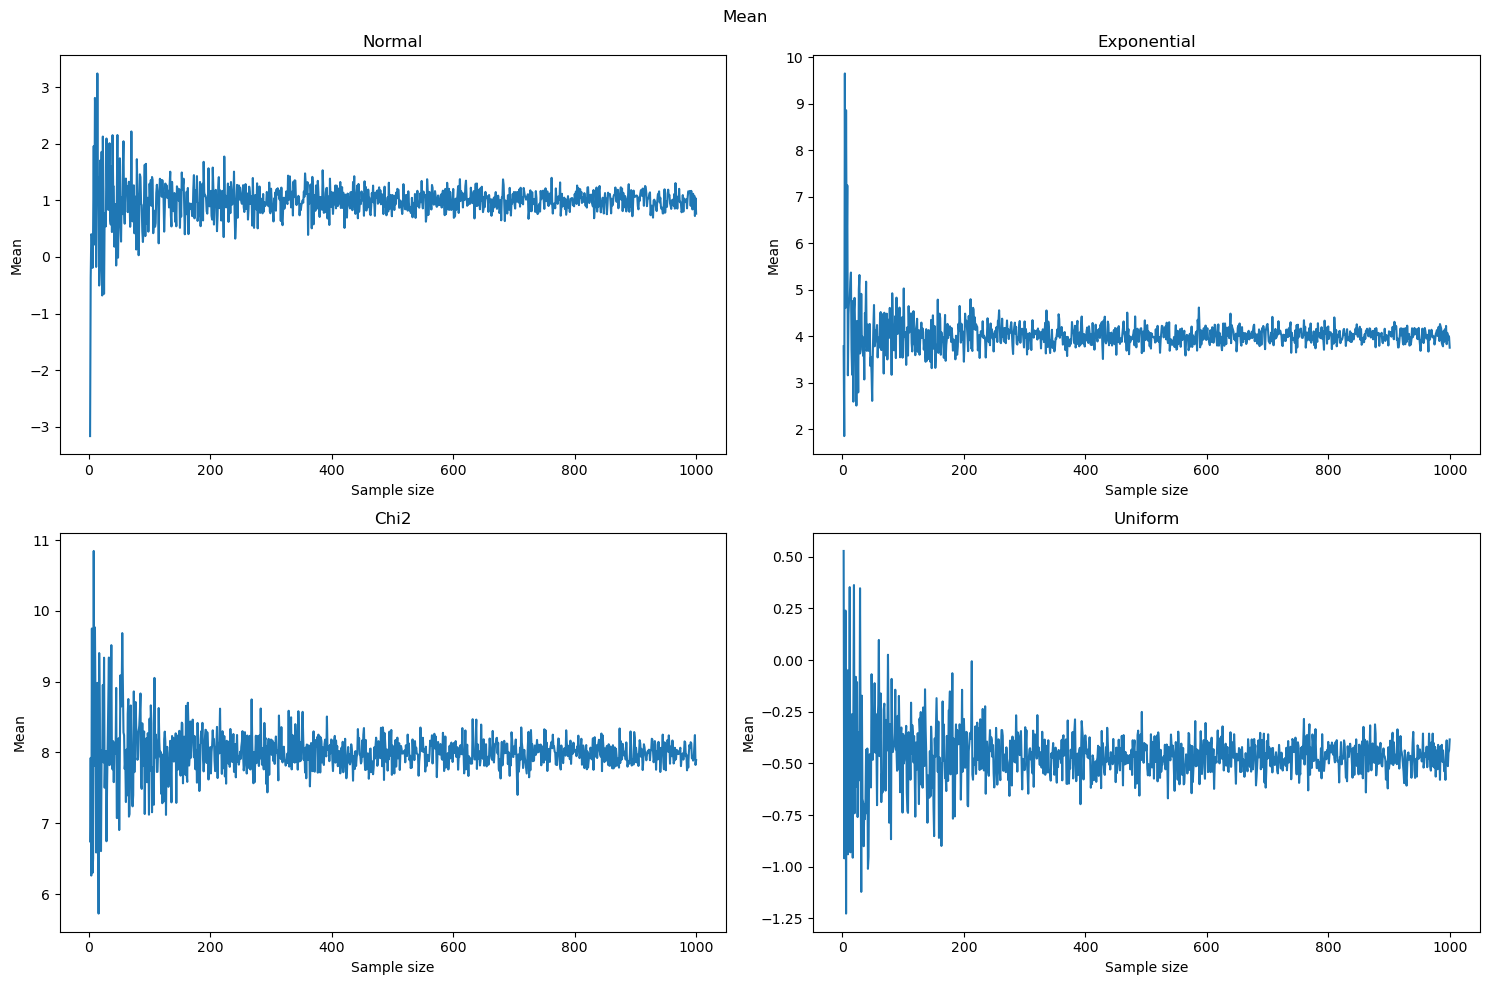

In [41]:
x = np.arange(2, 1001)

distributions = {
    "Normal": rv_norm,
    "Exponential": rv_expon,
    "Chi2": rv_chi2,
    "Uniform": rv_norm1,
}

samples = {name: [dist.rvs(size=i) for i in x] for name, dist in distributions.items()}
variances = {name: [np.var(sample) for sample in samples[name]] for name in distributions}
means = {name: [np.mean(sample) for sample in samples[name]] for name in distributions}

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Variance')

for i, (name, var) in enumerate(variances.items()):
    row, col = divmod(i, 2)
    ax[row, col].plot(x, var)
    ax[row, col].set_title(name)
    ax[row, col].set(xlabel='Sample size', ylabel='Variance')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Mean')

for i, (name, mean) in enumerate(means.items()):
    row, col = divmod(i, 2)
    ax[row, col].plot(x, mean)
    ax[row, col].set_title(name)
    ax[row, col].set(xlabel='Sample size', ylabel='Mean')

plt.tight_layout()
plt.show()


## Comment 
Here, I demonstrate the Law of Large Numbers by analyzing how the sample mean and variance converge to the theoretical values as the sample size increases. The code generates random samples for four distributions (Normal, Exponential, Chi-squared, and Uniform) across a range of sample sizes, from 2 to 1,000. For each sample size, the variance and mean are computed and plotted to show their relationship with the theoretical values. The results illustrate that as the sample size grows, both the sample mean and variance get closer to their respective theoretical values. This behavior reflects the fundamental idea that larger sample sizes provide better estimations of the population's statistical properties, which aligns with the Law of Large Numbers.

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

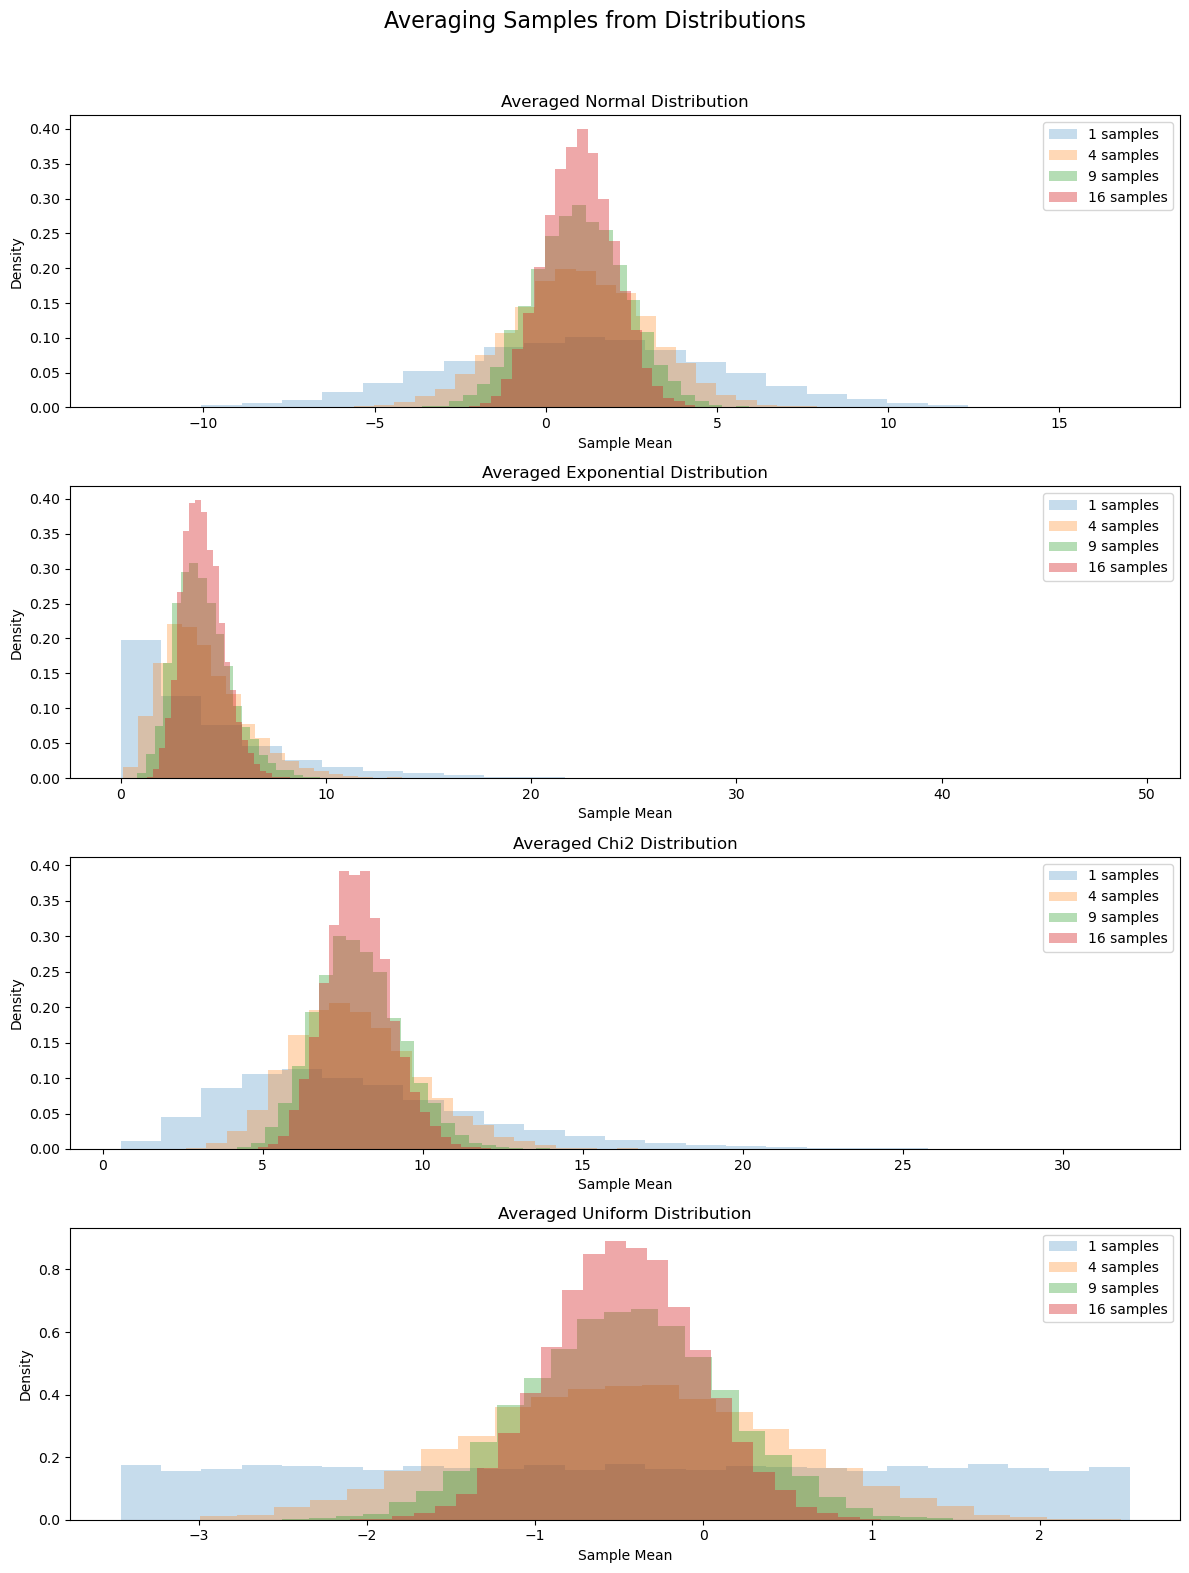

In [42]:
#here goes your code
get_samples = lambda dist, size: dist.rvs(size=size) 
num_iterations = 10000  
Ns = [1, 4, 9, 16]  
alphas = [0.25 + 0.05 * i for i in range(len(Ns))]  

fig, ax = plt.subplots(nrows=len(distributions), ncols=1, figsize=(12, 16))
fig.suptitle('Averaging Samples from Distributions', fontsize=16)

for plot_no, (name, distribution) in enumerate(distributions.items()):
    for N, alpha in zip(Ns, alphas):
        averages = [np.mean(get_samples(distribution, N)) for _ in range(num_iterations)]
        ax[plot_no].hist(averages, bins=25, density=True, alpha=alpha, label=f'{N} samples')
    ax[plot_no].legend()
    ax[plot_no].set_title(f'Averaged {name} Distribution')
    ax[plot_no].set_xlabel('Sample Mean')
    ax[plot_no].set_ylabel('Density')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

## Comment

Here, I show the central limit theorem by analyzing how the distribution of sample means converges to a normal distribution as the sample size increases. Using four different distributions (Normal, Exponential, Chi-squared, and Uniform), it calculates the mean of multiple random samples for varying sample sizes (1, 4, 9, 16) over 10,000 iterations. The histograms show how the means of the samples tend to form a distribution that resembles the normal distribution, regardless of the original distribution's shape.

The results highlight that as the sample size increases, the distribution of the means becomes smoother and closer to a normal distribution. This property confirms that even for non-normal distributions, the sample means approximate a normal distribution when sample sizes are large enough. Additionally, the mean of the sample means approaches the population mean, reflecting the central limit theorem's fundamental principle. This behavior provides practical insight into the importance of sample size in statistical analysis.

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

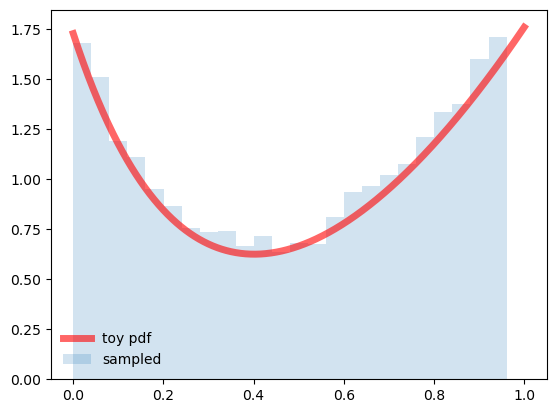

In [43]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    accepted = []
    while len(accepted) != size:
        t = uniform.rvs(0, 1)
        u = uniform.rvs(0, max(dist))
        if toy_dist(t) > u:
            accepted.append(t)
    return accepted



samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

## Comment
 The method produces samples that match the target distribution, as shown by the histogram aligning with the theoretical PDF. However, it requires about 70% more candidate draws than the desired sample size, highlighting its inefficiency for low acceptance rates. Despite this, the results confirm the correctness of the approach for the given distribution.

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

Version 1


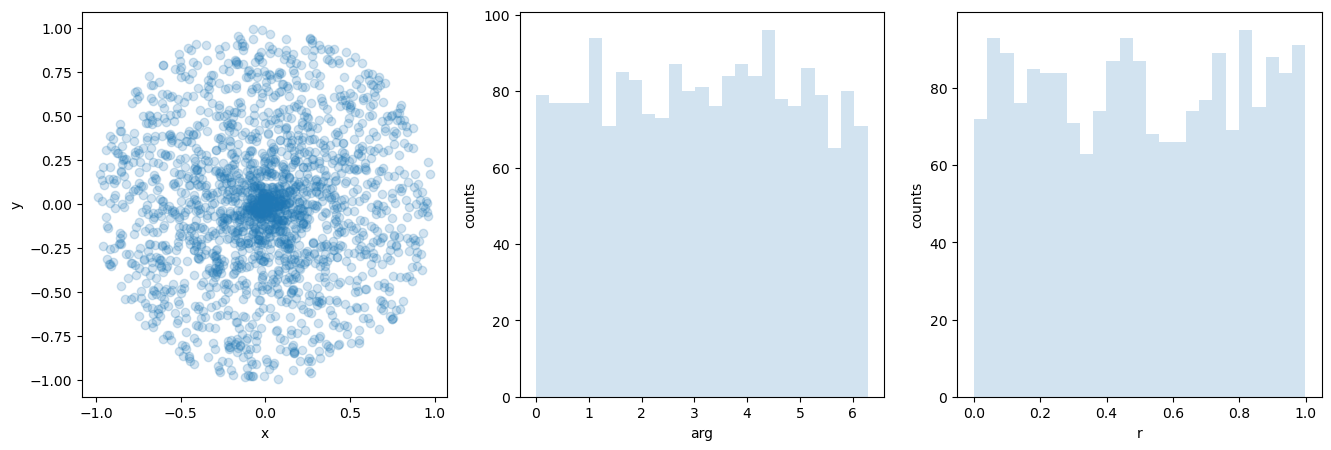

Version 2


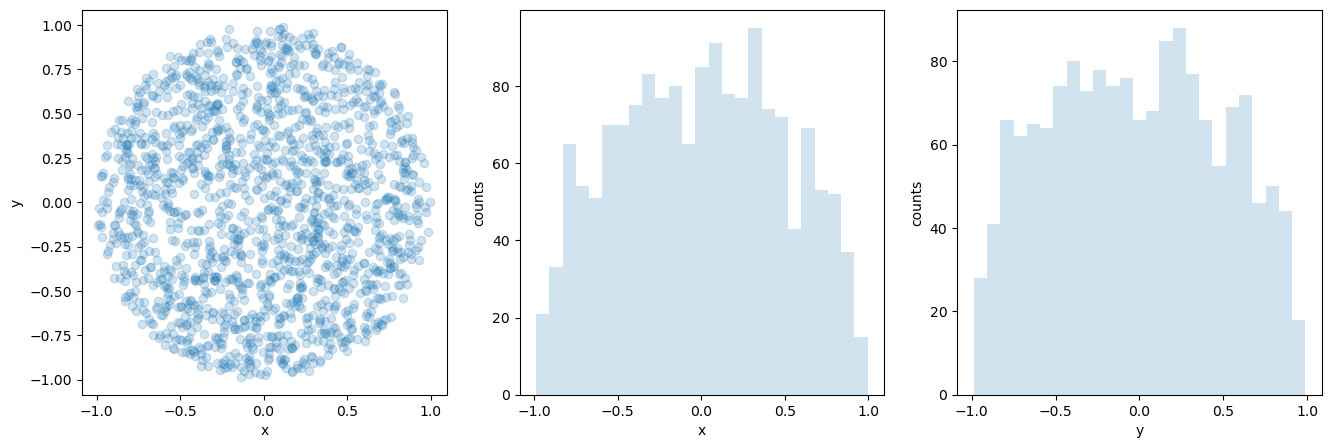

In [44]:
#Version1
#here goes your code
print("Version 1")
rv_uniform_rad = uniform(loc = 0, scale = 1)
rv_uniform_arg = uniform(loc = 0, scale = 2 * np.pi)
rad = rv_uniform_rad.rvs(2000)
arg = rv_uniform_arg.rvs(2000)
x = rad * np.sin(arg)
y = rad * np.cos(arg)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(x, y, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].hist(arg, histtype='stepfilled', alpha=0.2, bins=25)
ax[1].set_xlabel('arg')
ax[1].set_ylabel('counts')

ax[2].hist(rad, histtype='stepfilled', alpha=0.2, bins=25)
ax[2].set_xlabel('r')
ax[2].set_ylabel('counts')

plt.show()


#Version2


print("Version 2")

rv_uniform = uniform(loc = -1, scale = 2)
x_mess = rv_uniform.rvs(2000)
y_mess = rv_uniform.rvs(2000)

x = []
y = []

for x1, y1 in zip(x_mess, y_mess):
    if np.sqrt(x1**2 + y1**2) < 1:
        x.append(x1)
        y.append(y1)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(x, y, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].hist(x, histtype='stepfilled', alpha=0.2, bins=25)
ax[1].set_xlabel('x')
ax[1].set_ylabel('counts')

ax[2].hist(y, histtype='stepfilled', alpha=0.2, bins=25)
ax[2].set_xlabel('y')
ax[2].set_ylabel('counts')

plt.show()

#here goes your code

## Comment
Both methods generate points within the unit disk, but they differ in efficiency and uniformity. The first method always produces the specified number of samples and ensures a more uniform distribution, as it directly considers the shape of the unit disk. In contrast, the second method initially generates points within a square, discarding those outside the inscribed circle, which leads to fewer samples and a less uniform distribution due to the random placement and rejection of points. Despite these differences, both methods ultimately create points that are evenly spread over the unit disk.




Version 3


Text(0, 0.5, 'counts')

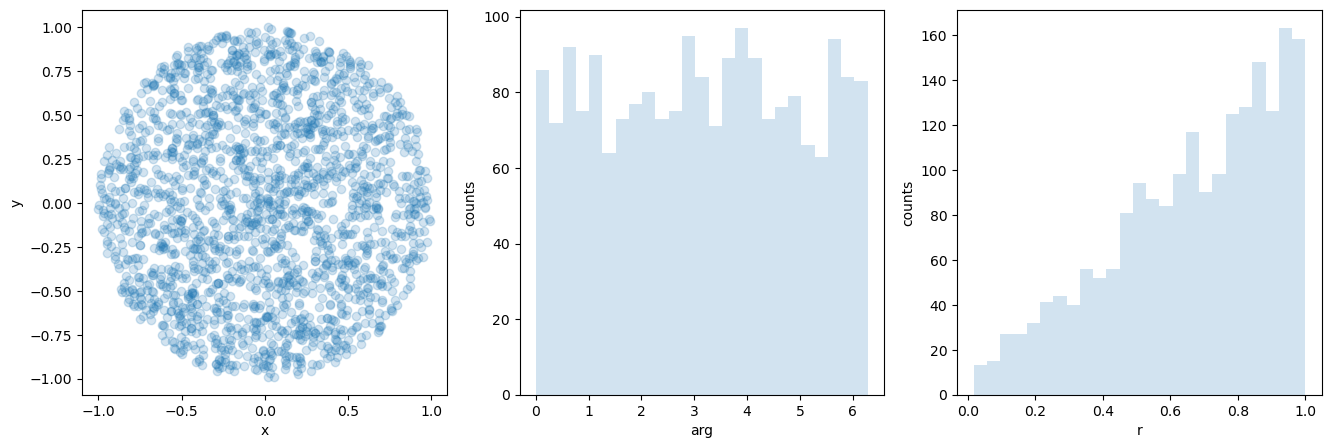

In [45]:
#Version3
print("Version 3")

rv_uniform_rad = uniform(loc = 0, scale = 1)
rv_uniform_arg = uniform(loc = 0, scale = 2 * np.pi)
rad = np.sqrt(1 - rv_uniform_rad.rvs(2000))
arg = rv_uniform_arg.rvs(2000)
x = rad * np.sin(arg)
y = rad * np.cos(arg)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(x, y, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].hist(arg, histtype='stepfilled', alpha=0.2, bins=25)
ax[1].set_xlabel('arg')
ax[1].set_ylabel('counts')

ax[2].hist(rad, histtype='stepfilled', alpha=0.2, bins=25)
ax[2].set_xlabel('r')
ax[2].set_ylabel('counts')


## Comment


## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [46]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

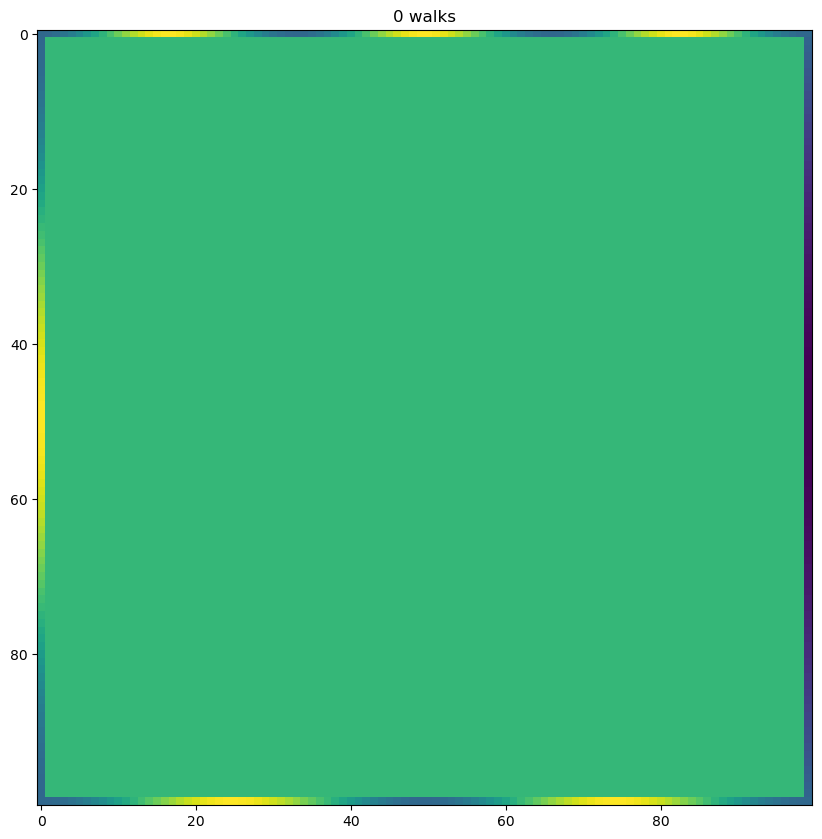

In [47]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

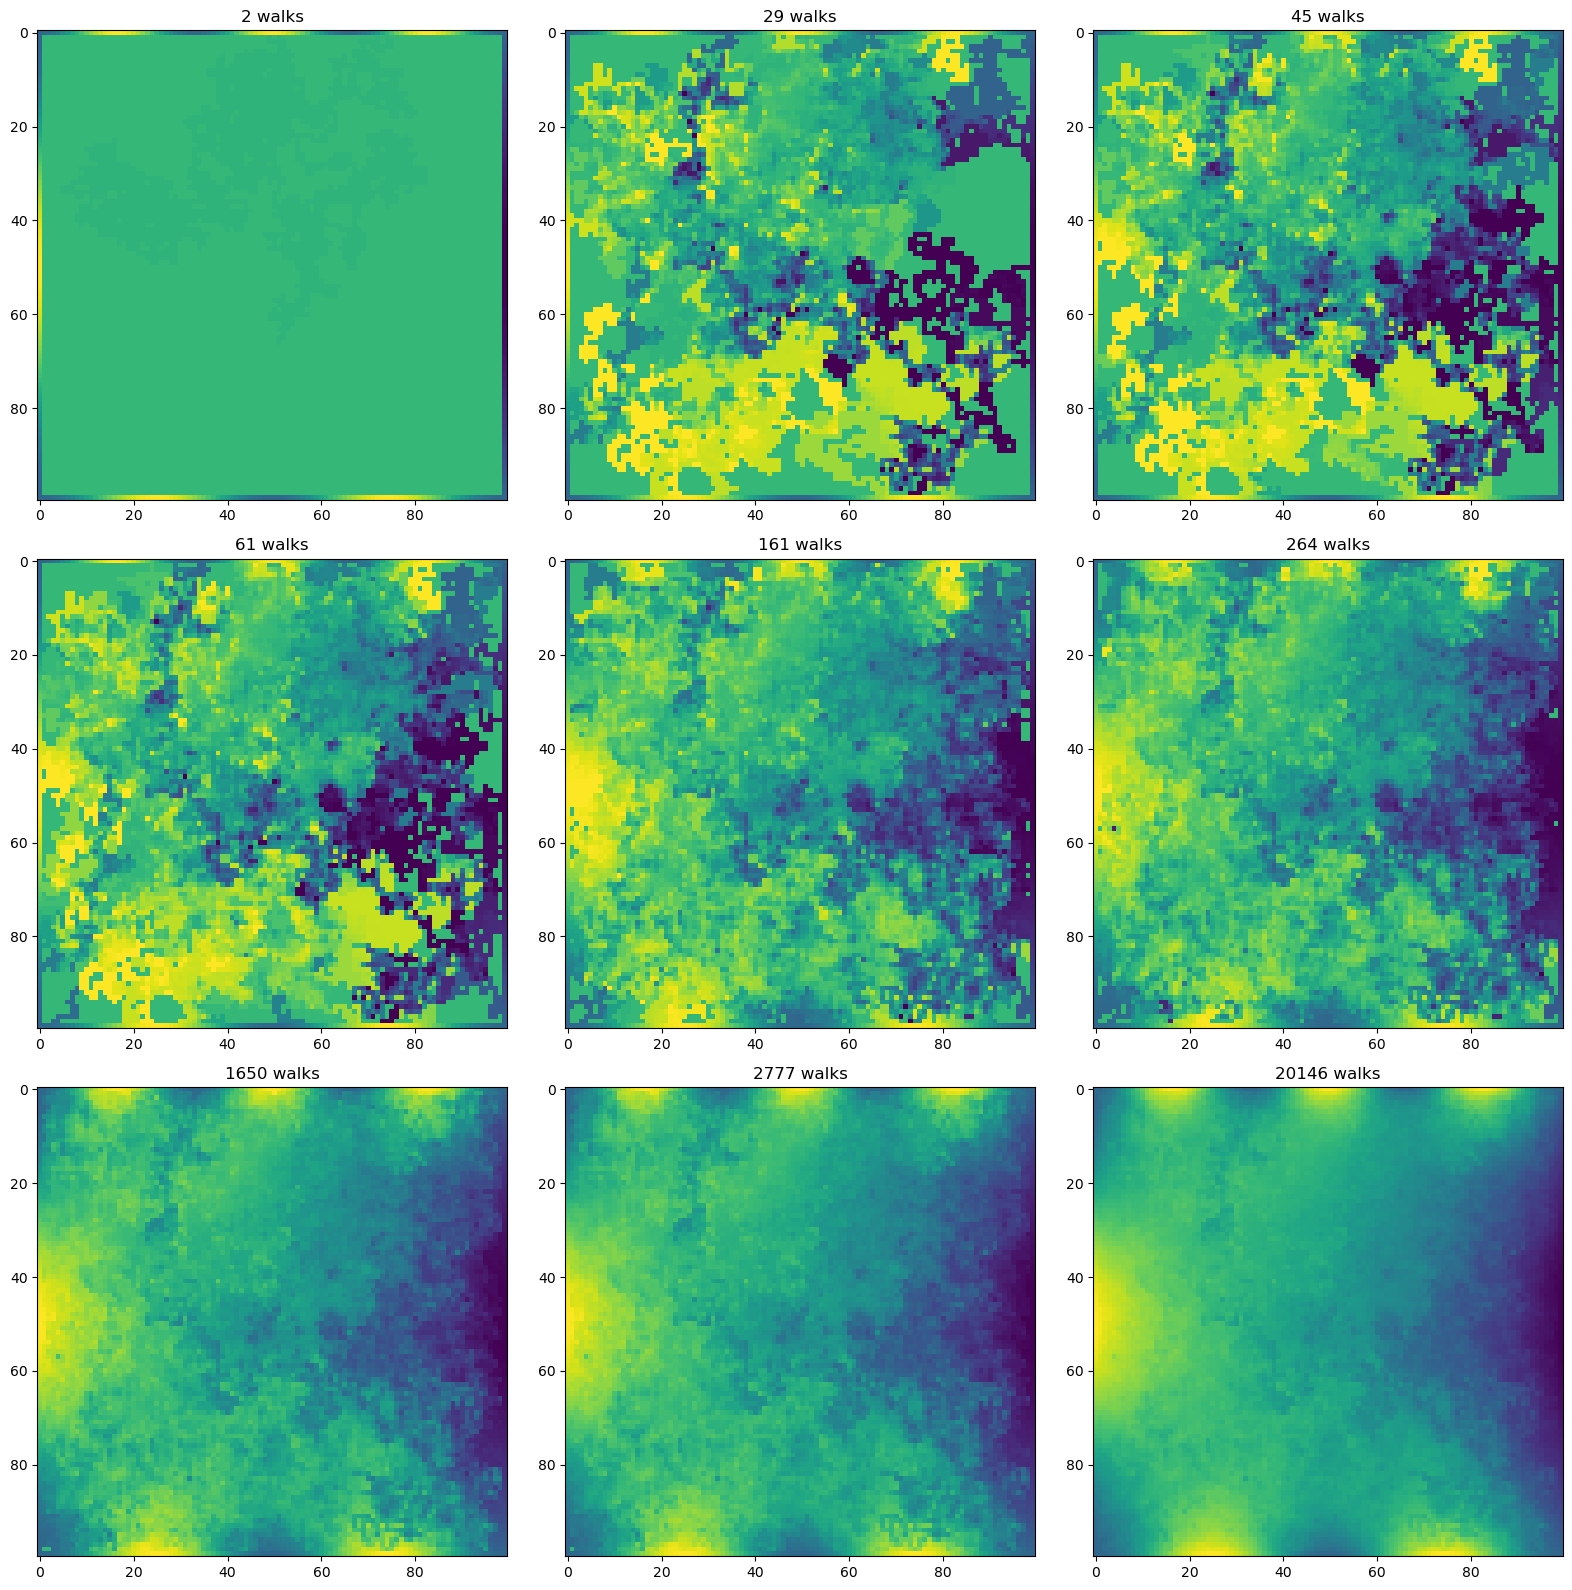

In [49]:
import random
import copy
S = 100
PRECISION = 1e-7
RELATIVE_CHANGE_INTERVALS = np.geomspace(PRECISION, 1e-1, num=10, endpoint=True)[::-1]
DIRECTIONS = [[1, 0], [-1, 0], [0, 1], [0, -1]]

plane = np.zeros((S, S))
plane_counts = np.zeros((S, S))

plane[0] = np.cos(np.linspace(-1.5, 1.5, S) * 2 * np.pi)
plane[-1] = -np.cos(np.linspace(-1, 1, S) * 2 * np.pi)
plane[:, 0] = np.cos(np.linspace(-0.5, 0.5, S) * 2 * np.pi)
plane[:, -1] = -2 + np.linspace(-1, 1, S) ** 2

planes = [copy.deepcopy(plane)]
relative_change_intervals = iter(RELATIVE_CHANGE_INTERVALS)
interval = next(relative_change_intervals)

max_subplots = 9
subplots_per_row = 3
plt.figure(figsize=(16, 16))

sub = 0
i = 0

while sub < max_subplots:
    i += 1
    start_x, start_y = np.random.randint(1, S - 1, 2)
    moves = []
    plane_counts_old = plane_counts.copy()

    while 0 < start_x < S - 1 and 0 < start_y < S - 1:
        plane_counts[start_y, start_x] += 1
        moves.append((start_y, start_x))
        direction = random.choice(DIRECTIONS)
        start_x, start_y = start_x + direction[1], start_y + direction[0]

    new_plane = planes[-1].copy()
    for move in moves:
        y, x = move
        new_plane[y, x] = (
                                  (plane_counts_old[y, x] * planes[-1][y, x]) + new_plane[start_y, start_x]
                          ) / (plane_counts_old[y, x] + 1)

    planes.append(new_plane)
    relative_change = np.linalg.norm(planes[-1] - planes[-2]) / np.linalg.norm(planes[-1])

    if relative_change < PRECISION * 1e-10:
        continue

    if relative_change <= interval:
        sub += 1
        plt.subplot(subplots_per_row, subplots_per_row, sub)
        plt.title(f'{len(planes)} walks')
        plt.imshow(planes[-1], cmap='viridis')
        interval = next(relative_change_intervals, float('inf'))
        print(f'Hit {sub} interval with precision: {relative_change:.5e}', end='\r')

plt.tight_layout()
plt.show()

## Comment

Here I simulate random walks on a 2D grid, updating grid values based on the paths taken by the walkers. Starting from random positions, walkers move in random directions until they leave the grid, updating visited cells with weighted averages. The plots show how the grid evolves with an increasing number of walks, starting sparsely and becoming more uniform and refined over time. With more walks, the grid converges to a smoother distribution, reflecting the cumulative effect of multiple visits. This process demonstrates how random walks can progressively stabilize a system.
